## 예제 8-4-1  이산 확률 알아보기 

##  사이파이 예시

https://web.stanford.edu/class/cs109/handouts/pythonForProbability.html

# lea 이산확률 모듈

https://bitbucket.org/piedenis/lea/wiki/Lea3_Tutorial_1

In [1]:
from lea import leaf                    ## 이산확률을 처리하는 모듈을 사용한다 
import lea
import numpy as np

In [2]:
dice = leaf.dice(1,prob_type='r')               ## 주사위를 한번 더질 경우의 확률과 확률값을 구한다. 
                                                ## prob_type='r'을 지정해서 분수로 표시한다.

In [3]:
dice

1 : 1/6
2 : 1/6
3 : 1/6
4 : 1/6
5 : 1/6
6 : 1/6

In [4]:
dice.support                        ## 주사위의 구성된 값을 확인한다. 

(1, 2, 3, 4, 5, 6)

In [5]:
dice.ps                              ## 주사위의 결과들이 나올 확률을 확인한다, 

(1/6, 1/6, 1/6, 1/6, 1/6, 1/6)

In [6]:
dice.p_sum                           ##  모든 확률은 모든 근원사건의 합은 항상 1이어야 한다. 

1

In [7]:
import pandas as pd                        ## 데이터프레임을 처리하기 위해 판다스 모듈을 사용한다. 

In [8]:
df = pd.DataFrame(dice.ps, index=dice.support, columns=['f(dice)'])  ## 확률값을 데이터로 지정한다.
                                                                     ## 인덱스는 주사위가 나올 숫자를 지정한다.
                                                                     ## 열에는 확률의 나올 이름을 부여한다. 

In [9]:
df.T                                                       ## 이 데이터프레임의 전치를 확인하면 각 숫자별 확률을 알 수 있다.

,1,2,3,4,5,6
f(dice),1/6,1/6,1/6,1/6,1/6,1/6


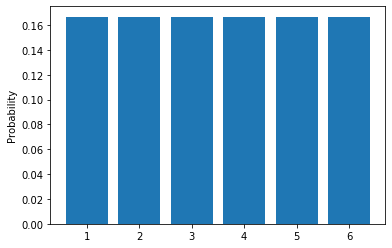

In [10]:
dice.plot()                                               ## 데이터프레임 내의 plot 함수를 사용해서 확률분포를 시각화한다 

In [11]:
x = dice.random_draw(1)                   ## 하나의 주사위를 굴려서 결과를 가져온다. 

In [12]:
x

(4,)

In [13]:
dice.p(x[0])                                  ## 이 주사위의 결과에 대한 확률을 확인한다 

1/6

In [14]:
dice2 = leaf.dice(2,prob_type='r')             ## 주사위를 두번 던져서 두 주사위의 합의 확률을 객체로 만든다. 

In [15]:
dice2

 2 : 1/36
 3 : 2/36
 4 : 3/36
 5 : 4/36
 6 : 5/36
 7 : 6/36
 8 : 5/36
 9 : 4/36
10 : 3/36
11 : 2/36
12 : 1/36

In [16]:
dice2.p_sum                      ## 이 모든 확률값의 합은 1이다 

1

In [17]:
df2 = pd.DataFrame(dice2.ps, index=dice2.support, columns=['f(dice2)'])     ## 데이터프레임으로 만들어서 확률분포를 확인한다

In [18]:
df2.T

,2,3,4,5,6,7,8,9,10,11,12
f(dice2),1/36,1/18,1/12,1/9,5/36,1/6,5/36,1/9,1/12,1/18,1/36


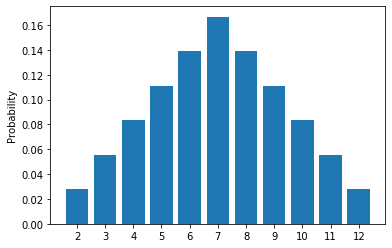

In [19]:
dice2.plot()

In [20]:
x = dice2.random_draw(1)                          ## 주사위 두개를 던져서 합산한 값을 구한다. 

In [21]:
x

(4,)

In [22]:
dice2.p(x[0])                                   ## 이 값의 확률을 확인한다 

1/12

In [23]:
symbol = lea.vals("A","B","B","C","C","C",prob_type='r')      ## 이번에는 특정 값을 입력해서 확률분포를 만든다. 
                                                              ## 전체 원소 개수중에 중복된 것을 합산해서 확률을 구한다.
    

In [24]:
symbol              

A : 1/6
B : 2/6
C : 3/6

In [25]:
symbol.p_sum

1

In [26]:
symbol.p('A') + symbol.p('B') + symbol.p('C')        ## 각 경우의 확률을 모두 더하면 1이다 

1

In [27]:
symbol2 = lea.pmf({"A":1, "B":2, "C":3})       ## 이를 pmf(확률질량함수)함수로 객체를 만들 수도 있다. 

In [28]:
symbol2                                       ## 확률에 대한 값을 실수로 표시된다

A : 0.16666666666666666
B : 0.3333333333333333
C : 0.5

In [29]:
symbol2.p_sum

1.0

## 동전 확률 등록

In [30]:
flip = lea.vals('Head','Tail',prob_type='r')            ## 동전을 처리하는 이산확률을 만든다. 

In [31]:
flip                                                    ## 두 사건의 확률은 균등해서 1/2이다 

Head : 1/2
Tail : 1/2

In [32]:
flip.p_sum

1

In [33]:
lea.P(flip == 'Tail')                                 ## 확률을 구하는 함수 P에 flip 에 뒷면이 같은 경우를  전달해서 확률을 구한다, 

1/2

In [34]:
flip.p('Tail')                                       ## 메소드 p를 사용해서 구할 수 있다. 

1/2

### 표 만들기

In [35]:
df = pd.DataFrame(flip.ps, index=flip.support, columns=['coin'])            ## 데이터프레임으로 확률분포를 만든다.

In [36]:
df.T

,Head,Tail
coin,1/2,1/2


### 동일한 결과 확인 

In [37]:
import random

In [38]:
random.seed(100)                                   ## 특정 무작위 같일 경우 동일한 값을 유지하기 위해 seed를 부옇나다. 
flip.random(5)                                     ## 5번 동전을 던지 결과를 확인한다.

('Head', 'Head', 'Tail', 'Tail', 'Tail')

In [39]:
random.seed(200)
flip.random(5)

('Head', 'Head', 'Tail', 'Head', 'Tail')

In [40]:
random.seed(100)                                       ## 동일한 seed 일때는 동일한 결과가 나온다. 
flip.random(5)

('Head', 'Head', 'Tail', 'Tail', 'Tail')

## 주사위 던지기

In [41]:
b = lea.P((dice== 2) | (dice == 4)| (dice==6))          ## 주사위를 굴릴때 짝수가 나오는 경우의 확률을 구한다. 

In [42]:
b                                                       ## 전체의 반이므로 1/2 가 나온다 

1/2

In [43]:
lea.P(dice==2) / lea.P((dice== 2) | (dice == 4)| (dice==6)) ## 주사위를 두번 굴릴때 짝수가 나온후에 다시 2가 나올 경우를 계산한다
                                                             ## 전체 발생하는 경우가 짝수가 나올 경우로 축소된다. 

1/3

### 특정 조건이 주어진 경우의 확률 

In [44]:
lea.P(dice == 4)                           ## 비교연산으로 특정 조건의 확률을 구한다. 

1/6

In [45]:
lea.P(dice % 2 == 0)                       ## 짝수일 경우는 모드연산을 사용해서 처리도 가능하다 

1/2

In [46]:
dice == 4                                 ## 비교연산을 사용하면 참과 거짓인 경우에 확률값을 표시한다. 

False : 5/6
True  : 1/6

In [47]:
dice.given((dice % 2 ==0)).p(4)                ## 짝수가 주어진 조건인 조건부 확률은 given 메소드를 사용해서 한정한다.
                                               ## 그 다음에 p 메소드로 분자를 계산하면 조건부 확률이 처리된다.

1/3

##  결합확률

In [48]:
die1 = lea.interval(1,6,prob_type='r')           ## 두 개의 확율을 만든다. 
die2 = die1.new()                                ## 기존에 만든 주사위 확률은 new로 하나 더 만든다. 

In [49]:
die12= lea.joint(die1,die2)                      ## 이 두 확률을 결합한다. 

In [50]:
df = pd.DataFrame(die12.ps, index=die12.support, columns=['dice joint'])         ## 환률 분포표흘 만든다. 

In [51]:
df.T

1                                   2                    ...  \
               1     2     3     4     5     6     1     2     3     4  ...   
dice joint  1/36  1/36  1/36  1/36  1/36  1/36  1/36  1/36  1/36  1/36  ...   

               5                       6                                
               3     4     5     6     1     2     3     4     5     6  
dice joint  1/36  1/36  1/36  1/36  1/36  1/36  1/36  1/36  1/36  1/36  

[1 rows x 36 columns]

In [52]:
die12.p_sum

1

In [53]:
 die12.given(die1 <= 2)                    ## 첫번째 주사위가 2보다 작은 수가 나올 조건부 확률을 구한다. 

(1, 1) : 1/12
(1, 2) : 1/12
(1, 3) : 1/12
(1, 4) : 1/12
(1, 5) : 1/12
(1, 6) : 1/12
(2, 1) : 1/12
(2, 2) : 1/12
(2, 3) : 1/12
(2, 4) : 1/12
(2, 5) : 1/12
(2, 6) : 1/12

In [54]:
 die12.given(die1 <= 2).p_sum             ## 이 조건부 확률이 합을 구하면 1이다. 

1

## 책에서 제외된 부분 

In [55]:
(dice % 2 ==  1).given(dice % 2 == 0)    ## 홀수만 선택한 확률에 짝수의 조건부 확률을 계산하면 참값이 없다. 

False : 1

In [56]:
lea.P((dice % 2 ==  1))               ## 주사위의 홀수 값만 나온 경우를 확인하면 1/2이다 

1/2

In [57]:
lea.P((dice % 2 ==  1)) * 1            ## 주사위의 홀수 값을 구한 확률에 곱셈연산도 가능하다 

1/2

In [58]:
xx = (dice % 2 ==  1).given(dice % 2 == 0)        ## 실제 발생할 수 없는 조건부 확률을 만들어본다. 

In [59]:
xx.ps[0]                                          ## False 값이 1인 것을 알 수 있다. 

1

In [63]:
lea.P((dice % 2 ==  1)) * (dice % 2 ==  1).given(dice % 2 == 0).ps[0]

1/2

In [67]:
lea.P((dice % 2 ==  1)) * (dice % 2 ==  1).given(dice % 2 == 0).ps[0]

1/2